
TensorFlow version: 2.15.0
Dataset shape: (284807, 31)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 31)]              0         
                                                                 
 dense (Dense)               (None, 8)                 256       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 8)                 40        
                                                                 
 dense_3 (Dense)             (None, 31)                279       
                                                                 
Total params: 611 (2.39 KB)
Trainable params: 611 (2.39 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________

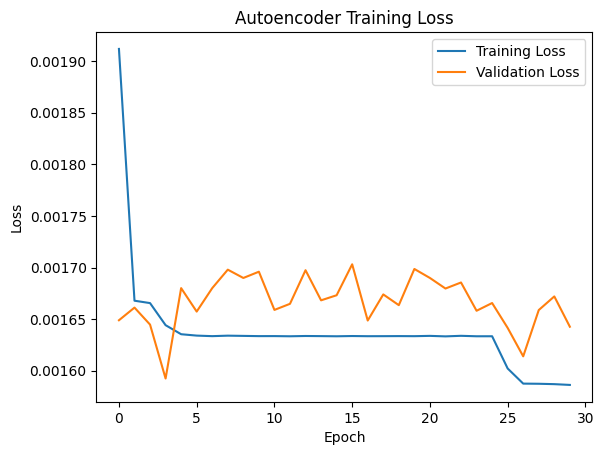

In [1]:
# ------------------------------------------------------
# a. Import Required Libraries
# ------------------------------------------------------
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

# ------------------------------------------------------
# b. Load the Dataset
# ------------------------------------------------------
# Example: numeric CSV file
data = pd.read_csv("C:/Users/UMESH/OneDrive/Desktop/creditcard.csv")


# Convert to numpy
X = data.values


# Normalize (very important for Autoencoders)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("Dataset shape:", X_scaled.shape)

# ------------------------------------------------------
# c. Build Encoder (Compress Input → Latent Vector)
# ------------------------------------------------------
input_dim = X_scaled.shape[1]
encoding_dim = 4   # small latent dimension

input_layer = Input(shape=(input_dim,))
encoder = Dense(8, activation='relu')(input_layer)
encoder = Dense(encoding_dim, activation='relu')(encoder)

# ------------------------------------------------------
# d. Build Decoder (Reconstruct original input)
# ------------------------------------------------------
decoder = Dense(8, activation='relu')(encoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

# Full Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# ------------------------------------------------------
# e. Compile the Model
# ------------------------------------------------------
autoencoder.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='mse',
    metrics=['mae']
)

autoencoder.summary()

# ------------------------------------------------------
# f. Train the Autoencoder
# ------------------------------------------------------
history = autoencoder.fit(
    X_scaled, X_scaled,
    epochs=30,
    batch_size=32,
    validation_split=0.1
)

# ------------------------------------------------------
# g. Compute Reconstruction Error (for Anomaly Detection)
# ------------------------------------------------------
reconstructed = autoencoder.predict(X_scaled)
errors = np.mean(np.square(X_scaled - reconstructed), axis=1)

# Set threshold
threshold = np.mean(errors) + 3 * np.std(errors)
print("Threshold:", threshold)

# Mark anomalies
anomalies = errors > threshold

print("Total anomalies detected:", np.sum(anomalies))

# ------------------------------------------------------
# h. Plot training loss
# ------------------------------------------------------
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Autoencoder Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
